In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import RandomOverSampler
from tabulate import tabulate
import time
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Distributions
import scipy

In [2]:
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')
df3 = pd.concat([df1, df2])
df3.to_csv('student.csv', index=True)

In [3]:
data = pd.read_csv("student.csv", sep = ";")
data.head()

,",school",sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"0,""GP","F""""",18,"U""""","GT3""""","A""""",4,4,"at_home""""","teacher""""",...,4,3,4,1,1,3,6,"5""""","6""""","6"""
1,"1,""GP","F""""",17,"U""""","GT3""""","T""""",1,1,"at_home""""","other""""",...,5,3,3,1,1,3,4,"5""""","5""""","6"""
2,"2,""GP","F""""",15,"U""""","LE3""""","T""""",1,1,"at_home""""","other""""",...,4,3,2,2,3,3,10,"7""""","8""""","10"""
3,"3,""GP","F""""",15,"U""""","GT3""""","T""""",4,2,"health""""","services""""",...,3,2,2,1,1,5,2,"15""""","14""""","15"""
4,"4,""GP","F""""",16,"U""""","GT3""""","T""""",3,3,"other""""","other""""",...,4,3,2,1,2,5,4,"6""""","10""""","10"""


In [4]:
data.shape

(1044, 33)

In [5]:
data.columns

Index([',school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
data['Fjob']

0        teacher""
1          other""
2          other""
3       services""
4          other""
           ...    
1039       other""
1040    services""
1041       other""
1042    services""
1043       other""
Name: Fjob, Length: 1044, dtype: object

In [7]:
data1 = data.replace('"', '', regex=True)

In [8]:
data1.head()

,",school",sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"0,GP",F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,"1,GP",F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,"2,GP",F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,"3,GP",F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,"4,GP",F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
data1['age'] = pd.to_numeric(data1['age'], errors='coerce')
data1['Medu'] = pd.to_numeric(data1['Medu'], errors='coerce')
data1['Fedu'] = pd.to_numeric(data1['Fedu'], errors='coerce')
data1['traveltime'] = pd.to_numeric(data1['traveltime'], errors='coerce')
data1['studytime'] = pd.to_numeric(data1['studytime'], errors='coerce')
data1['failures'] = pd.to_numeric(data1['failures'], errors='coerce')
data1['famrel'] = pd.to_numeric(data1['famrel'], errors='coerce')
data1['freetime'] = pd.to_numeric(data1['freetime'], errors='coerce')
data1['goout'] = pd.to_numeric(data1['goout'], errors='coerce')
data1['Dalc'] = pd.to_numeric(data1['Dalc'], errors='coerce')
data1['Walc'] = pd.to_numeric(data1['Walc'], errors='coerce')
data1['health'] = pd.to_numeric(data1['health'], errors='coerce')
data1['absences'] = pd.to_numeric(data1['absences'], errors='coerce')
data1['G1'] = pd.to_numeric(data1['G1'], errors='coerce')
data1['G2'] = pd.to_numeric(data1['G2'], errors='coerce')
data1['G3'] = pd.to_numeric(data1['G3'], errors='coerce')

In [10]:
data1[['S.No', 'School']] = data1[',school'].str.split(',', expand=True)

In [11]:
data1['G3'].describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ,school     1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [13]:
data1['School']

0       GP
1       GP
2       GP
3       GP
4       GP
        ..
1039    MS
1040    MS
1041    MS
1042    MS
1043    MS
Name: School, Length: 1044, dtype: object

In [14]:
data1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
data1.isnull().any()

,school       False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
S.No          False
School        False
dtype: bool

In [16]:
data1.duplicated().any()

False

**Encoding categorical variables using LabelEncoder()**

In [17]:
# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

# Encode the categorical columns
for column in data1.select_dtypes(include=["object"]):
    data1[column] = le.fit_transform(data1[column])

In [18]:
data1.head()

,",school",sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,S.No,School
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,0,0
1,1,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,1,0
2,112,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,112,0
3,223,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,223,0
4,380,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,334,0


In [19]:
data1.tail()

,",school",sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,S.No,School
1039,652,0,19,0,0,1,2,3,3,2,...,2,1,2,5,4,10,11,10,606,1
1040,653,0,18,1,1,1,3,1,4,3,...,4,1,1,1,4,15,15,16,607,1
1041,654,0,18,1,0,1,1,1,2,2,...,1,1,1,5,6,11,12,9,608,1
1042,655,1,17,1,1,1,3,1,3,3,...,5,3,4,2,6,10,10,10,609,1
1043,656,1,18,0,1,1,3,2,3,2,...,1,3,4,5,4,10,11,11,610,1


In [20]:
data1.corr()['G3'].sort_values()    # Correlation wrt G3

failures     -0.383145
Dalc         -0.129642
School       -0.127114
age          -0.125282
Walc         -0.115740
traveltime   -0.102627
romantic     -0.098363
goout        -0.097877
health       -0.080079
schoolsup    -0.079346
guardian     -0.077320
freetime     -0.064890
paid         -0.049388
absences     -0.045671
sex          -0.031472
Pstatus      -0.030693
,school       0.009344
S.No          0.010742
famsup        0.013313
activities    0.033998
nursery       0.039950
Fjob          0.040541
famrel        0.054461
famsize       0.061209
Mjob          0.105640
internet      0.107064
reason        0.108671
address       0.117696
Fedu          0.159796
studytime     0.161629
Medu          0.201472
higher        0.236578
G1            0.809142
G2            0.910743
G3            1.000000
Name: G3, dtype: float64

In [21]:
# Find correlations with the Grade
most_correlated = data1.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3           1.000000
G2           0.910743
G1           0.809142
failures     0.383145
higher       0.236578
Medu         0.201472
studytime    0.161629
Fedu         0.159796
Dalc         0.129642
Name: G3, dtype: float64

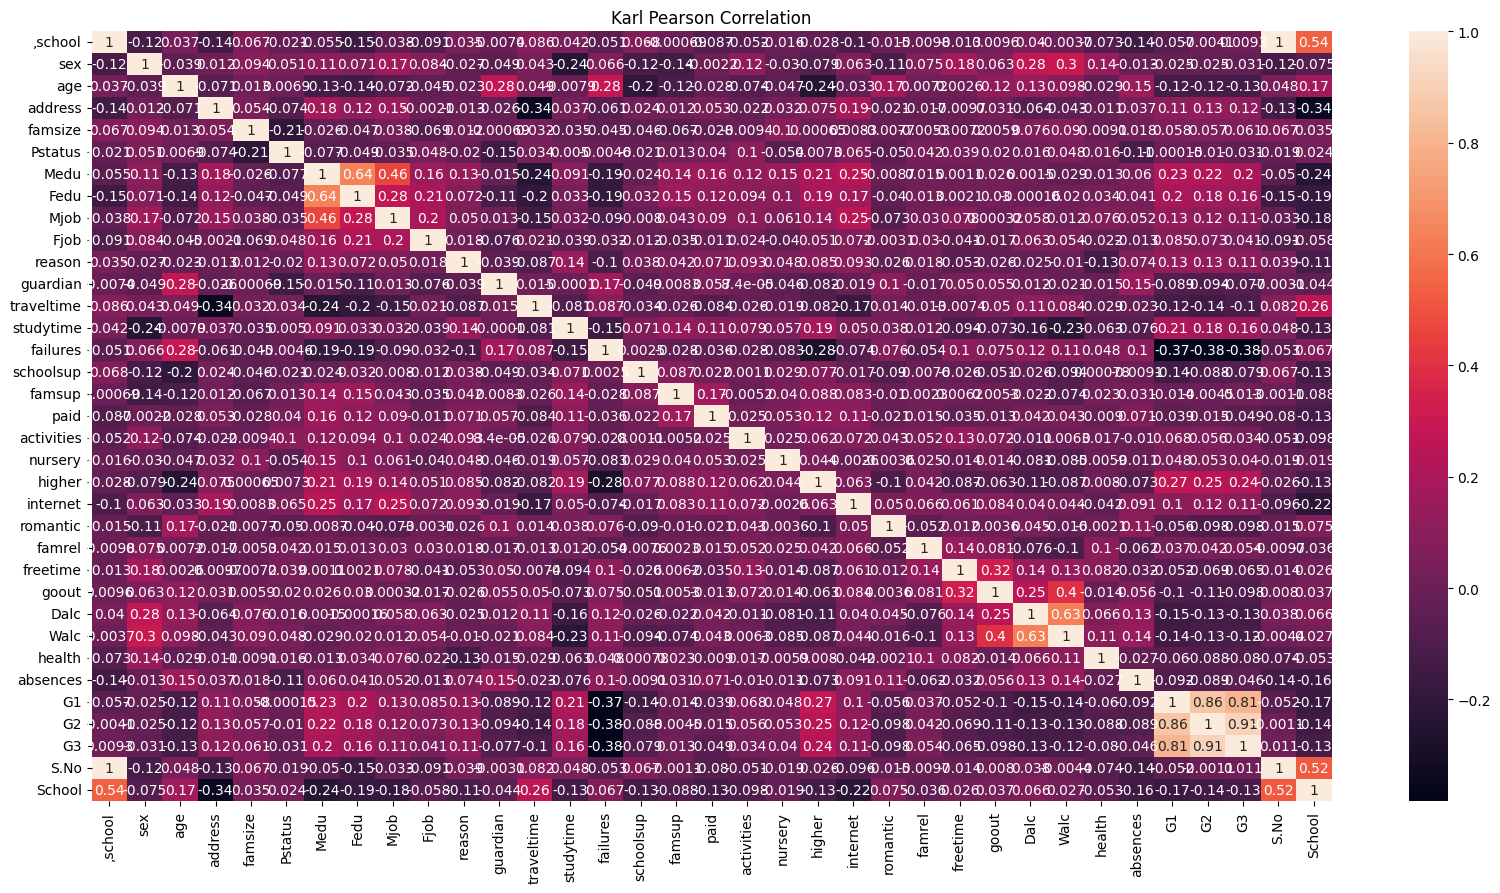

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(method="pearson"),annot=True)
plt.title("Karl Pearson Correlation")
plt.show()

In [22]:
data1.shape

(1044, 35)

In [23]:
data1 = data1.drop([',school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'S.No', 'School'], axis='columns')

In [24]:
from scipy.stats.mstats import winsorize

# Apply Winsorization to the entire dataset
winsorized_data = data1.copy()

for column in data1.columns:
    if data1[column].dtype in [int, float]:
        winsorized_data[column] = winsorize(data1[column], limits=[0.05, 0.05])

# The winsorized_data DataFrame now contains the dataset with outliers replaced by winsorized values


In [25]:
winsorized_data.columns

Index(['Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc', 'Walc',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [26]:
'''
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
Interqr = Q3 - Q1
print(Interqr)

data1 = data1[~((data1 < (Q1 - 1.5 * Interqr)) |(data1 > (Q3 + 1.5 * Interqr))).any(axis=1)]
'''

'\nQ1 = data1.quantile(0.25)\nQ3 = data1.quantile(0.75)\nInterqr = Q3 - Q1\nprint(Interqr)\n\ndata1 = data1[~((data1 < (Q1 - 1.5 * Interqr)) |(data1 > (Q3 + 1.5 * Interqr))).any(axis=1)]\n'

In [27]:
data1.shape

(1044, 11)

# **Machine Learning Algorithms**

In [28]:
data1['G3'].sort_values

<bound method Series.sort_values of 0        6
1        6
3       15
4       10
5       15
        ..
1038    10
1040    16
1041     9
1042    10
1043    11
Name: G3, Length: 684, dtype: int64>

In [30]:
class_counts = data1['G3'].value_counts().sort_index()
total_count = class_counts.sum()

print(class_counts)
print("Total count:", total_count)


G3
5       2
6      11
7       3
8      23
9      32
10     87
11    106
12     77
13     86
14     78
15     75
16     47
17     31
18     20
19      6
Name: count, dtype: int64
Total count: 684


In [31]:
missing_values = data1['G3'].isnull().sum()
print("Number of missing values:", missing_values)


Number of missing values: 0


In [32]:
unique_values = data1['G3'].unique()
print("Unique values:", unique_values)


Unique values: [ 6 15 10 11 19  9 12 14 16  8 17 18 13  5  7]


In [33]:
num_rows = data1.shape[0]
print("Number of rows:", num_rows)


Number of rows: 684


In [34]:
duplicate_rows = data1[data1.duplicated(subset='G3')]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 669


In [35]:
data1['G3'].duplicated().any()

True

In [36]:
class_counts = data1['G3'].value_counts().sort_index()

for class_value, count in class_counts.items():
    print(f"Class {class_value}: {count}")

Class 5: 2
Class 6: 11
Class 7: 3
Class 8: 23
Class 9: 32
Class 10: 87
Class 11: 106
Class 12: 77
Class 13: 86
Class 14: 78
Class 15: 75
Class 16: 47
Class 17: 31
Class 18: 20
Class 19: 6


In [75]:
# Calculate class counts and sort by index
class_counts = data1['G3'].value_counts().sort_index()
print("The grades of top 5 classes are,")
# Get the top 5 classes based on count
top_classes = class_counts.nlargest(5)

# Print the values of the top 5 classes with a specific format
for class_value, count in top_classes.items():
    print(f"No of Students who scored Grade {class_value}: {count}")

The grades of top 5 classes are,
No of Students who scored Grade 10: 153
No of Students who scored Grade 11: 151
No of Students who scored Grade 13: 113
No of Students who scored Grade 12: 103
No of Students who scored Grade 14: 90


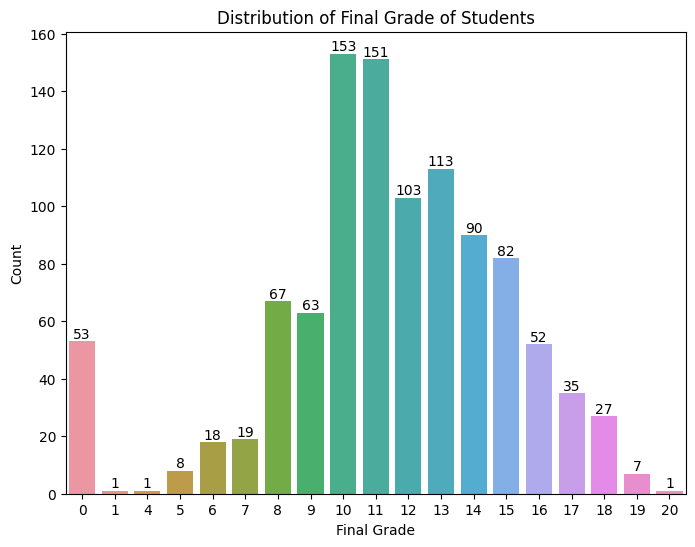

In [76]:
class_counts = data1['G3'].value_counts().sort_index()

# Plot the class distribution using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grade of Students')

for x, y in zip(range(len(class_counts)), class_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

# Exploratory Data Analysis

# **Failure Attribute**

[Text(0.5, 23.52222222222222, 'Previous Failures'),
 Text(33.972222222222214, 0.5, 'Final Grade (G3)')]

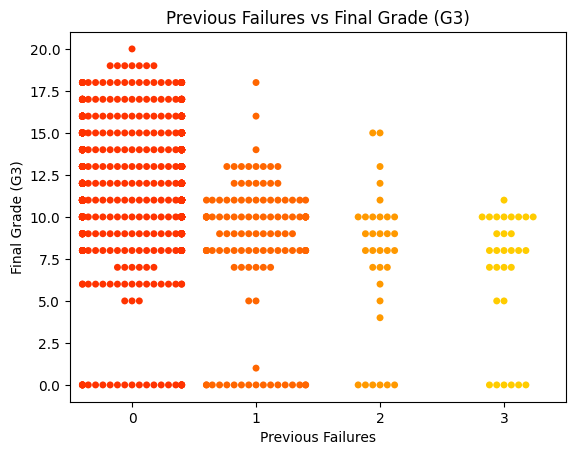

In [77]:
a = sns.swarmplot(x=data1['failures'],y=data1['G3'],palette='autumn')
a.axes.set_title('Previous Failures vs Final Grade (G3)')
a.set(xlabel='Previous Failures', ylabel='Final Grade (G3)')

**Observation : Student with less previous failures usually score higher.**

# **Family Education Attribute ( Fedu + Medu )**

[Text(0.5, 23.52222222222222, 'Family Education (Father & Mother)'),
 Text(33.972222222222214, 0.5, 'Final Grade (G3)')]

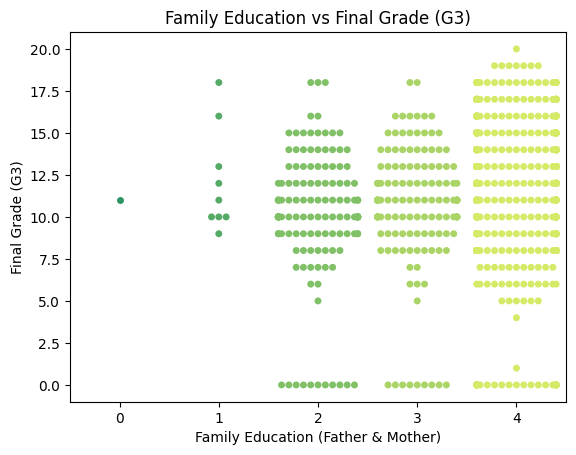

In [125]:
# Combine 'Medu' and 'Fedu'
combined_edu = data1['Medu'] + data1['Fedu']

# Create a new variable with combined categories
combined_categories = []
for value in combined_edu:
    if value == 0:
        combined_categories.append(0)
    elif value == 1:
        combined_categories.append(1)
    elif value == 2:
        combined_categories.append(2)
    elif value == 3:
        combined_categories.append(3)
    else:
        combined_categories.append(4)

# Assign the new variable to the DataFrame
data1['FEdu'] = combined_categories
data.to_csv('student.csv', index=False)

b = sns.swarmplot(x=data1['FEdu'], y=data1['G3'],palette='summer')
b.axes.set_title('Family Education vs Final Grade (G3)')
b.set(xlabel='Family Education (Father & Mother)', ylabel='Final Grade (G3)')

**Observation : Educated families result in higher grades**

# **Wish to go for Higher Education Attribute**

[Text(0.5, 23.52222222222222, 'Higher Education'),
 Text(33.972222222222214, 0.5, 'Final Grade (G3)')]

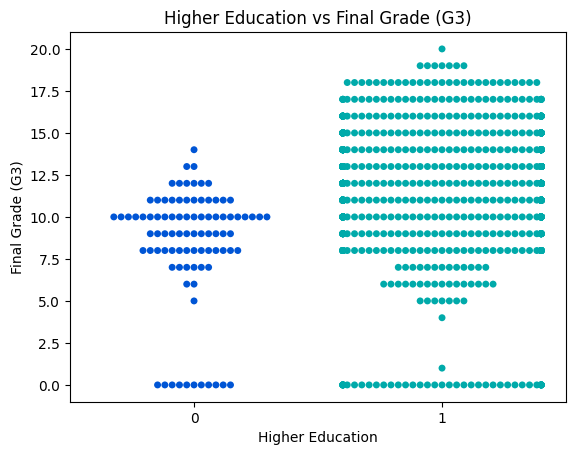

In [55]:
c = sns.swarmplot(x=data1['higher'],y=data1['G3'],palette='winter')
c.axes.set_title('Higher Education vs Final Grade (G3)')
c.set(xlabel='Higher Education', ylabel='Final Grade (G3)')

**Observation : Students who wish to go for higher studies score more**

# **Going Out with Friends Attribute**

[Text(0.5, 23.52222222222222, 'Going Out'),
 Text(33.972222222222214, 0.5, 'Final Grade (G3)')]

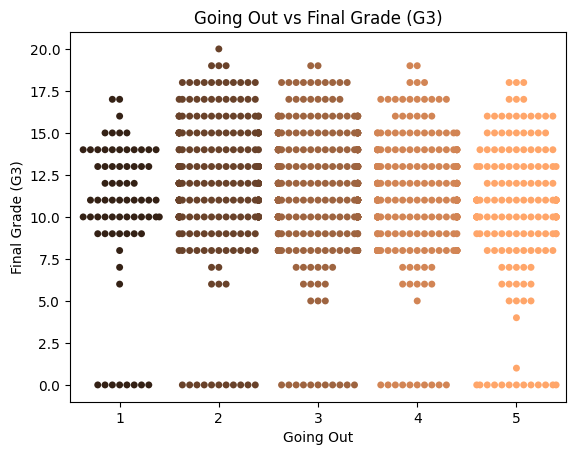

In [56]:
d = sns.swarmplot(x=data1['goout'],y=data1['G3'],palette='copper')
d.axes.set_title('Going Out vs Final Grade (G3)')
d.set(xlabel='Going Out', ylabel='Final Grade (G3)')

**Observation :The students have an average score when it comes to going out with friends. Students who go out a lot score less**

# **Romantic relationship Attribute**

[Text(0.5, 23.52222222222222, 'Romantic Relationship'),
 Text(33.972222222222214, 0.5, 'Final Grade (G3)')]

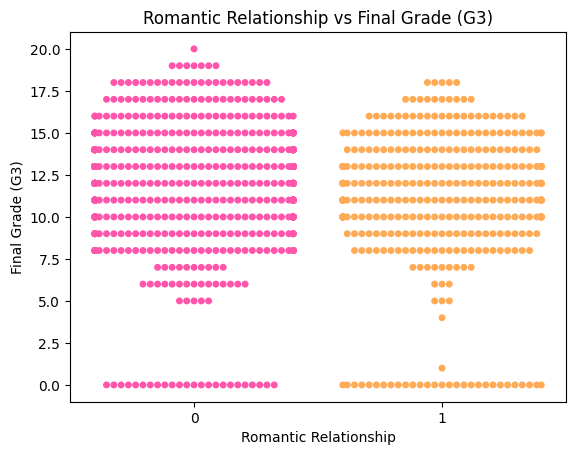

In [57]:
e = sns.swarmplot(x=data1['romantic'],y=data1['G3'],palette='spring')
e.axes.set_title('Romantic Relationship vs Final Grade (G3)')
e.set(xlabel='Romantic Relationship', ylabel='Final Grade (G3)')

**Here romantic attribute with value 0 means no relationship and value with 1 means in relationship**

**Observation : Students with no romantic relationship score higher**

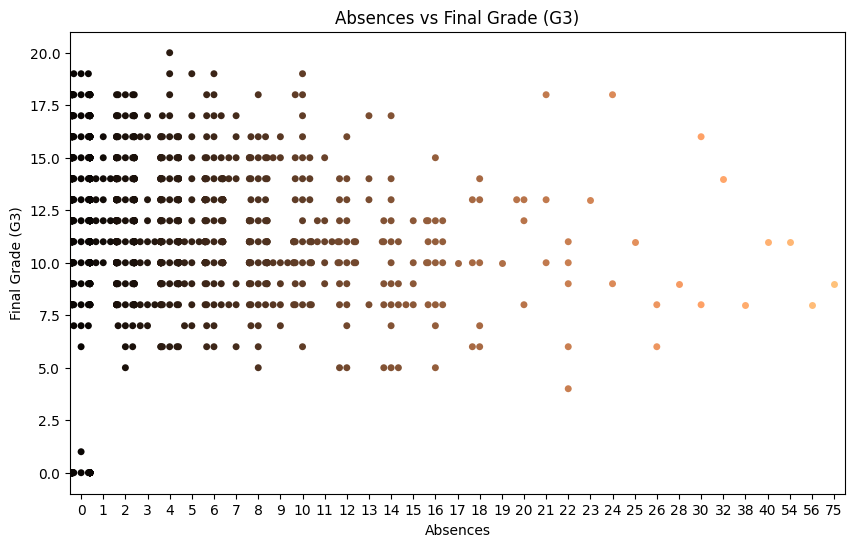

In [58]:
# Create the figure object with the desired figsize
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the values (width, height) as per your preference

# Use the swarmplot function
sns.swarmplot(x=data1['absences'], y=data1['G3'], palette='copper', ax=ax)

# Set the title, xlabel, and ylabel
ax.set_title('Absences vs Final Grade (G3)')
ax.set_xlabel('Absences')
ax.set_ylabel('Final Grade (G3)')

# Display the plot
plt.show()


In [37]:
data1.columns

Index(['Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc', 'Walc',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [83]:
class_counts = data1['G3'].value_counts().sort_index()

for class_value, count in class_counts.items():
    print(f"Class {class_value}: {count}")

Class 0: 53
Class 1: 1
Class 4: 1
Class 5: 8
Class 6: 18
Class 7: 19
Class 8: 67
Class 9: 63
Class 10: 153
Class 11: 151
Class 12: 103
Class 13: 113
Class 14: 90
Class 15: 82
Class 16: 52
Class 17: 35
Class 18: 27
Class 19: 7
Class 20: 1


In [30]:
#data1 = data1.drop([',school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'S.No', 'School', 'FEdu'], axis='columns')

In [28]:
import pandas as pd
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data1.drop(columns=['G3'])
y = data1['G3']

# Check the class distribution before applying Borderline-SMOTE
print("Class distribution before applying Borderline-SMOTE:")
print(Counter(y))

# Apply Borderline-SMOTE to the dataset
smote = BorderlineSMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Check the class distribution after applying Borderline-SMOTE
print("Class distribution after applying Borderline-SMOTE:")
print(Counter(y_smote))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=12345)

# Add the 'G3' column back to X_train and X_test
X_train['G3'] = y_train
X_test['G3'] = y_test

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Class distribution before applying Borderline-SMOTE:
Counter({10: 153, 11: 151, 13: 113, 12: 103, 14: 90, 15: 82, 8: 67, 9: 63, 0: 53, 16: 52, 17: 35, 18: 27, 7: 19, 6: 18, 5: 8, 19: 7, 20: 1, 4: 1, 1: 1})
Class distribution after applying Borderline-SMOTE:
Counter({6: 153, 10: 153, 15: 153, 11: 153, 19: 153, 9: 153, 12: 153, 14: 153, 16: 153, 5: 153, 8: 153, 17: 153, 18: 153, 13: 153, 7: 153, 0: 153, 20: 1, 4: 1, 1: 1})
Training set shape: (1960, 11) (1960,)
Testing set shape: (491, 11) (491,)


In [29]:
y_train

654     10
1453     7
903      9
55      10
1097     0
        ..
2153    17
546     13
382     10
2177    17
482     15
Name: G3, Length: 1960, dtype: int64

In [43]:
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train['G3'] = y_train
X_test['G3'] = y_test
'''

In [84]:
import pandas as pd

# Assuming your dataset is stored in a variable called 'data1'

# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Exclude self-correlations (diagonal elements)
correlation_matrix = correlation_matrix.where(~pd.DataFrame(np.eye(correlation_matrix.shape[0], dtype=bool), index=correlation_matrix.index, columns=correlation_matrix.columns))

# Remove constant or non-varying features
correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Reshape the correlation matrix as a Series to sort the values
correlation_table = correlation_matrix.unstack().sort_values(ascending=False)

# Print the top 5 most correlated feature pairs
print("Top 5 most correlated features:")
top_correlated_pairs = correlation_table.head(20)
print(top_correlated_pairs)

Top 5 most correlated features:
G3      G2        0.910743
G2      G3        0.910743
        G1        0.858739
G1      G2        0.858739
G3      G1        0.809142
G1      G3        0.809142
Fedu    Medu      0.642063
Medu    Fedu      0.642063
Dalc    Walc      0.627814
Walc    Dalc      0.627814
higher  G1        0.271476
G1      higher    0.271476
G2      higher    0.250619
higher  G2        0.250619
G3      higher    0.236578
higher  G3        0.236578
Medu    G1        0.226101
G1      Medu      0.226101
G2      Medu      0.224662
Medu    G2        0.224662
dtype: float64


In [85]:
import pandas as pd
import numpy as np

# Assuming your dataset is stored in a variable called 'data1'

# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Exclude self-correlations (diagonal elements)
correlation_matrix = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))

# Reshape the correlation matrix as a Series to sort the values
correlation_table = correlation_matrix.unstack().sort_values(ascending=True)

# Remove NaN values from the correlation table
correlation_table = correlation_table.dropna()

# Print the least correlated feature pairs
print("Least correlated features:")
least_correlated_pairs = correlation_table.head(40)
print(least_correlated_pairs)


Least correlated features:
G3         failures    -0.383145
failures   G3          -0.383145
G2         failures    -0.377172
failures   G2          -0.377172
G1         failures    -0.374175
failures   G1          -0.374175
           higher      -0.284893
higher     failures    -0.284893
studytime  Walc        -0.229073
Walc       studytime   -0.229073
failures   Fedu        -0.191390
Fedu       failures    -0.191390
failures   Medu        -0.187769
Medu       failures    -0.187769
Dalc       studytime   -0.159665
studytime  Dalc        -0.159665
           failures    -0.152024
failures   studytime   -0.152024
G1         Dalc        -0.150943
Dalc       G1          -0.150943
G1         Walc        -0.142401
Walc       G1          -0.142401
G2         Dalc        -0.131576
Dalc       G2          -0.131576
G3         Dalc        -0.129642
Dalc       G3          -0.129642
Walc       G2          -0.128114
G2         Walc        -0.128114
G3         Walc        -0.115740
Walc       G3   

In [30]:
X_train.head()

,Medu,Fedu,studytime,failures,higher,Dalc,Walc,absences,G1,G2,G3
654,1,1,3,0,1,1,2,10,11,10,10
1453,1,1,1,2,0,1,4,0,5,7,7
903,2,2,1,1,1,1,2,0,10,9,9
55,2,1,2,0,1,1,1,8,8,9,10
1097,2,1,2,0,1,1,2,0,8,8,0


# **MAE - Mean Absolute Error & RMSE - Root Mean Square Error**

In [31]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [32]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [33]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 4.4521
Median Baseline RMSE: 5.3763


In [35]:
pip install auto-sklearn

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\ELCOT\AppData\Local\Temp\pip-build-env-yv0xk_yy\overlay\Lib\site-packages\setuptools\build_meta.py", line 341, in get_requires_for_build_wheel
      return self._get_build_requires(config_

In [82]:
from tabulate import tabulate
from sklearn.metrics import r2_score

# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees',
                      'Gradient Boosting', 'LGBM Regressor', 'CatBoost Regressor', 'Voting Regressor']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Instantiate the models
    model1 = LinearRegression(fit_intercept=True, n_jobs = 5, positive = True)
    model2 = ElasticNet(alpha=0.5, l1_ratio=0.9, fit_intercept = True, precompute = True, max_iter = 1000, copy_X = False, tol = 0, warm_start = False, positive = True, random_state = 50, selection = 'random')
    model3 = RandomForestRegressor(n_estimators=1000, criterion = 'poisson', max_depth = 100, min_samples_split = 5, min_samples_leaf = 10, min_weight_fraction_leaf = 0, max_features = 'auto', max_leaf_nodes = 100, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = 10, random_state = 5, verbose = 0, warm_start = False, ccp_alpha = 0)
    model4 = ExtraTreesRegressor(n_estimators=700, criterion = 'friedman_mse', max_depth = 700, min_samples_split = 2, min_samples_leaf = 5, min_weight_fraction_leaf = 0, max_features = 'auto', max_leaf_nodes = 500, min_impurity_decrease = 0.9, bootstrap = True, oob_score = True, n_jobs = 5, random_state = 1, verbose = 0, warm_start = True, ccp_alpha = 0)
    model5 = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators=52, criterion = 'squared_error')
    model6 = LGBMRegressor(colsample_bytree = 1.0, learning_rate = 0.1, n_estimators = 100, num_leaves = 31)
    model7 = CatBoostRegressor(depth = 4, iterations = 300, l2_leaf_reg = 1, learning_rate = 0.1, verbose= False)
    model8 = VotingRegressor(estimators=[("random_forest", RandomForestRegressor()),
                                    ("catboost", CatBoostRegressor(verbose= False)),
                                    ("lgbm", LGBMRegressor())])

    # Dataframe for results
    results = []

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7, model8]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        r2 = r2_score(y_test, predictions)

        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        # Insert results into the list
        model_name = model_name_list[i]
        results.append([model_name, r2, mae, rmse])

    # Add accuracy (R2 score) to the metrics table
    headers = ['Model', 'Accuracy(R2 Score)', 'MAE', 'RMSE']
    table = tabulate(results, headers=headers, floatfmt=".4f", tablefmt="fancy_grid")

    # Print the results table
    print(table)

    # Return the metrics table
    return results

# Call the evaluate function
metrics = evaluate(X_train, X_test, y_train, y_test)

╒═══════════════════════╤══════════════════════╤════════╤════════╕
│ Model                 │   Accuracy(R2 Score) │    MAE │   RMSE │
╞═══════════════════════╪══════════════════════╪════════╪════════╡
│ Linear Regression     │               0.8509 │ 1.1822 │ 2.0473 │
├───────────────────────┼──────────────────────┼────────┼────────┤
│ ElasticNet Regression │               0.8483 │ 1.1641 │ 2.0650 │
├───────────────────────┼──────────────────────┼────────┼────────┤
│ Random Forest         │               0.9253 │ 0.8381 │ 1.4494 │
├───────────────────────┼──────────────────────┼────────┼────────┤
│ Extra Trees           │               0.9312 │ 0.8066 │ 1.3905 │
├───────────────────────┼──────────────────────┼────────┼────────┤
│ Gradient Boosting     │               0.9168 │ 0.9242 │ 1.5293 │
├───────────────────────┼──────────────────────┼────────┼────────┤
│ LGBM Regressor        │               0.9482 │ 0.6808 │ 1.2067 │
├───────────────────────┼──────────────────────┼────────┼─────

In [161]:
0.8763, 0.8754, 0.9237, 0.9323, 0.9188, 0.9277, 0.9290, 0.9414

(0.8657, 0.8652, 0.9267, 0.9371, 0.9197, 0.9403, 0.9303, 0.9512)

In [84]:
# Evaluate several ML models by training on the training set and testing on the testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees',
                      'Gradient Boosting', 'LGBM Regressor', 'CatBoost Regressor', 'Voting Regressor']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Instantiate the models
    model1 = LinearRegression(fit_intercept=True, n_jobs = 5, positive = True)
    model2 = ElasticNet(alpha=0.5, l1_ratio=0.9, fit_intercept = True, precompute = True, max_iter = 1000, copy_X = False, tol = 0, warm_start = False, positive = True, random_state = 50, selection = 'random')
    model3 = RandomForestRegressor(n_estimators=1000, criterion = 'poisson', max_depth = 100, min_samples_split = 5, min_samples_leaf = 10, min_weight_fraction_leaf = 0, max_features = 'auto', max_leaf_nodes = 100, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = 10, random_state = 5, verbose = 0, warm_start = False, ccp_alpha = 0)
    model4 = ExtraTreesRegressor(n_estimators=700, criterion = 'friedman_mse', max_depth = 700, min_samples_split = 2, min_samples_leaf = 5, min_weight_fraction_leaf = 0, max_features = 'auto', max_leaf_nodes = 500, min_impurity_decrease = 0.9, bootstrap = True, oob_score = True, n_jobs = 5, random_state = 1, verbose = 0, warm_start = True, ccp_alpha = 0)
    model5 = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators=52, criterion = 'squared_error')
    model6 = LGBMRegressor(colsample_bytree = 1.0, learning_rate = 0.1, n_estimators = 100, num_leaves = 31)
    model7 = CatBoostRegressor(depth = 4, iterations = 300, l2_leaf_reg = 1, learning_rate = 0.1, verbose= False)
    model8 = VotingRegressor(estimators=[("random_forest", RandomForestRegressor()),
                                    ("catboost", CatBoostRegressor(verbose= False)),
                                    ("lgbm", LGBMRegressor())])

    # Dataframe for results
    results1 = pd.DataFrame(columns=['r2', 'mae', 'rmse'],
                            index=model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7, model8]):
        #start_time = time.time()  # Start timer
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        #end_time = time.time()  # End timer

        # Metrics
        #elapsed_time = end_time - start_time
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        r2 = r2_score(y_test, predictions)
        #msle = np.mean((np.log1p(predictions) - np.log1p(y_test)) ** 2)
        #explained_variance = explained_variance_score(y_test, predictions)
        #medae = np.median(abs(predictions - y_test))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results1.loc[model_name, :] = [r2, mae, rmse]

    return results1

results1 = evaluate(X_train, X_test, y_train, y_test)
results1


,r2,mae,rmse
Linear Regression,0.850928,1.182246,2.047258
ElasticNet Regression,0.848327,1.164069,2.065042
Random Forest,0.925279,0.838145,1.449429
Extra Trees,0.931227,0.806567,1.390544
Gradient Boosting,0.916818,0.924152,1.529291
LGBM Regressor,0.948206,0.680821,1.206737
CatBoost Regressor,0.933817,0.790656,1.364107
Voting Regressor,0.952411,0.601222,1.156714


In [164]:
0.8763, 0.8754, 0.9237, 0.9323, 0.9188, 0.9277, 0.9290, 0.9414

(0.8657, 0.8652, 0.9267, 0.9371, 0.9197, 0.9403, 0.9303, 0.9512)

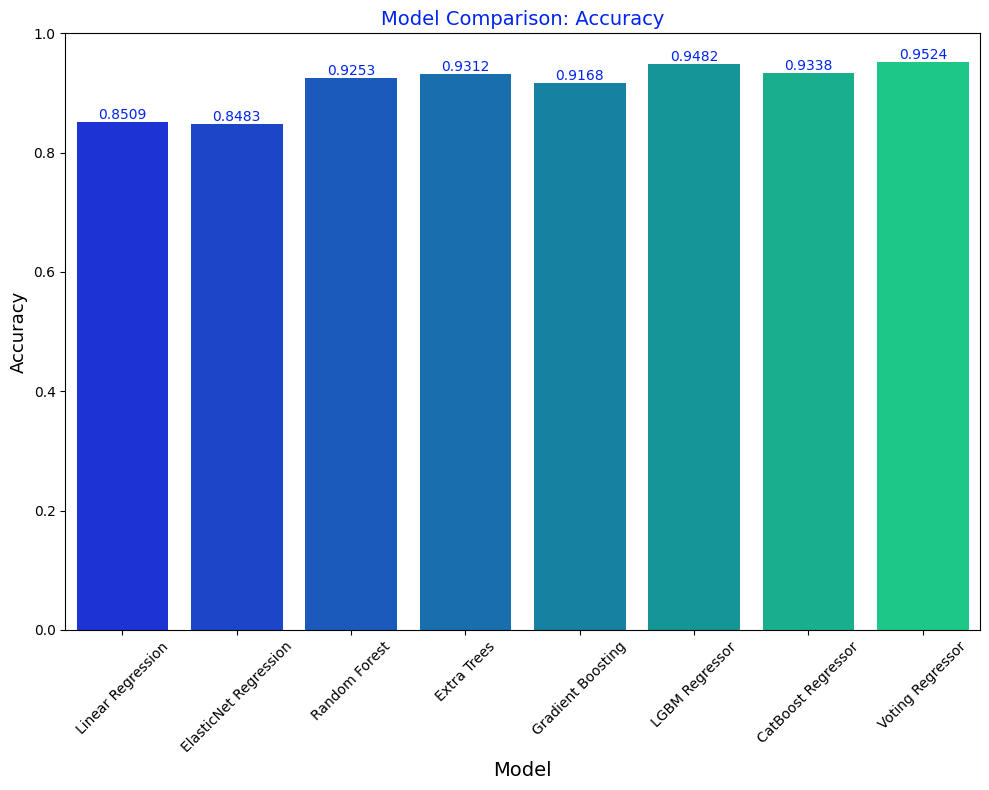

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define model names and accuracy values
model_names = results1.index.tolist()
accuracy_values = results1['r2'].values

# Generate positions for the bars
x = np.arange(len(model_names))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Model Comparison: Accuracy', fontsize=14, color=sns.color_palette('winter')[0])

# Use sns.barplot for accuracy with color palette
sns.barplot(x=x, y=accuracy_values, palette='winter', ax=ax)

# Set x-axis tick positions and labels
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)

# Add text labels to the bar plot
for i, j in zip(x, accuracy_values):
    ax.text(i, j, f'{j:.4f}', ha='center', va='bottom', color=sns.color_palette('winter')[0])

# Adjust the plot layout
fig.tight_layout()

# Show the plot
plt.show()


# **Error Plots**

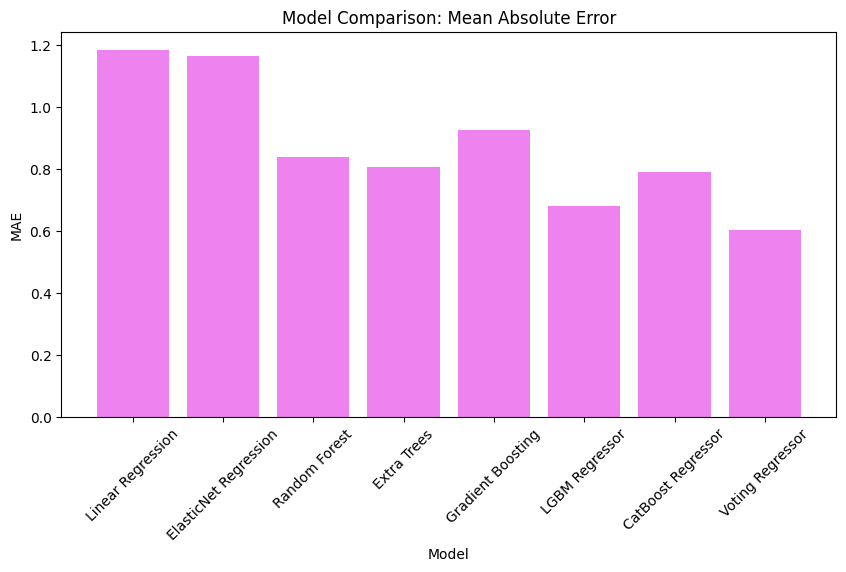

In [86]:
import matplotlib.pyplot as plt

# Plot MAE
plt.figure(figsize=(10, 5))
bars = plt.bar(results1.index, results1['mae'], color='violet')
plt.title('Model Comparison: Mean Absolute Error')

# Add value labels on top of each bar
#for bar in bars:
 #   height = bar.get_height()
  #  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', color='violet')

plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

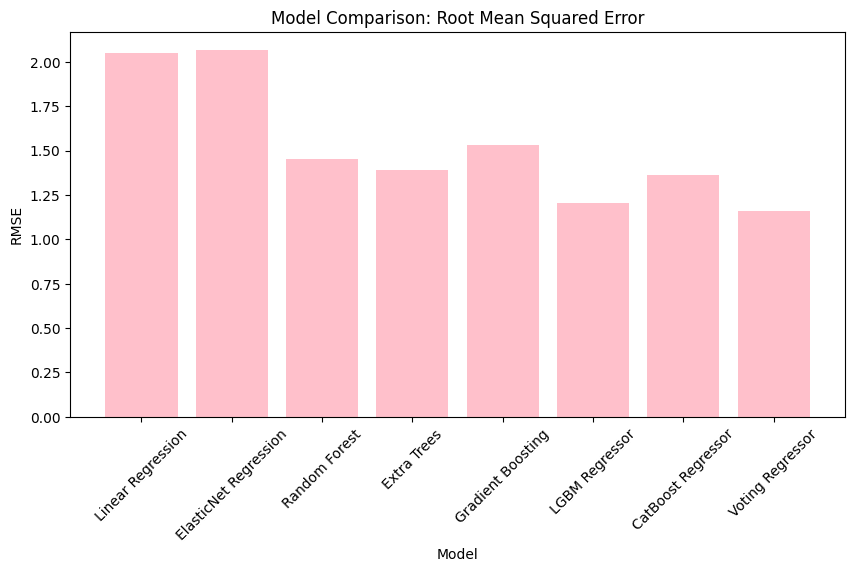

In [87]:
# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(results1.index, results1['rmse'], color='pink')
plt.title('Model Comparison: Root Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

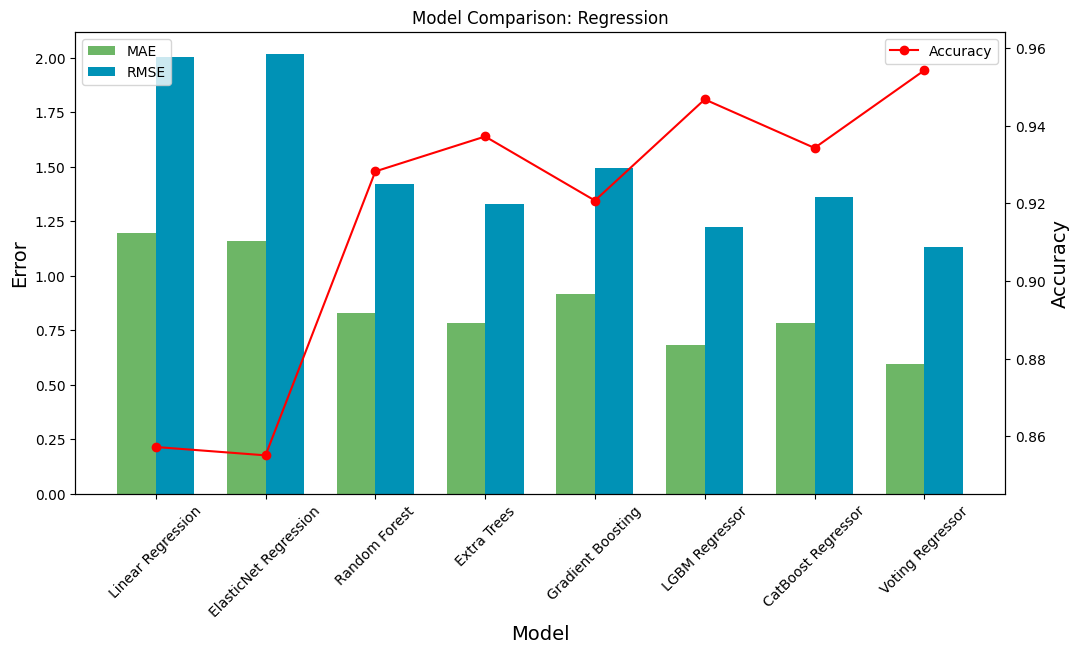

In [95]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define the models and their positions on the x-axis
models = results1.index
positions = np.arange(len(models))

# Define the width of each bar
bar_width = 0.35

# Plot MAE
bar1 = plt.bar(positions - bar_width/2, results1['mae'], width=bar_width, label='MAE', color=sns.color_palette('summer')[2])

# Plot RMSE
bar2 = plt.bar(positions + bar_width/2, results1['rmse'], width=bar_width, label='RMSE', color=sns.color_palette('winter')[3])

# Set labels and title
plt.title('Model Comparison: Regression')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Error', fontsize=14)

# Set the x-axis tick positions and labels
plt.xticks(positions, models, rotation=45)

# Create a secondary axis for the line chart
ax2 = plt.twinx()
ax2.set_ylabel('Accuracy', fontsize=14)

# Plot accuracy as a line plot
line = ax2.plot(positions, results1['r2'], marker='o', color='red', label='Accuracy')

# Combine the bar and line legends
legend = plt.legend([bar1, bar2, line[0]], ['MAE', 'RMSE'], loc='upper left')

# Set the legend to be within the plot area
plt.gca().add_artist(legend)

# Adjust the position of the legends
plt.legend(loc='upper right')

# Increase the right margin to accommodate the legend
plt.margins(0.05, 0.1)

# Show the plot
plt.show()


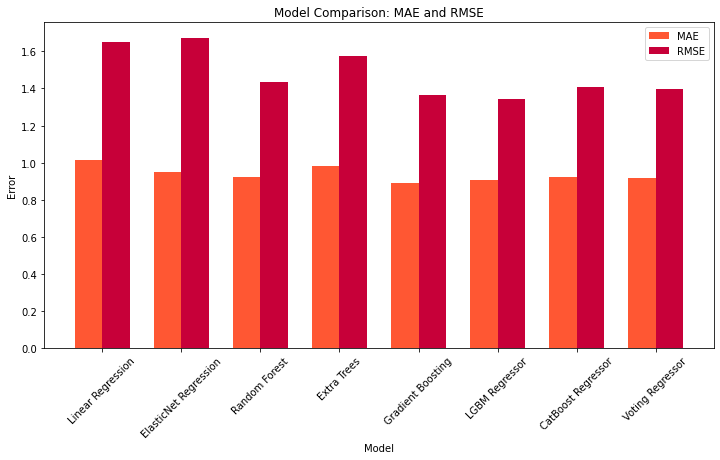

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the models and their positions on the x-axis
models = results1.index
positions = np.arange(len(models))

# Define the width of each bar
bar_width = 0.35

# Define unique colors for the bars
colors = ['#FF5733', '#C70039']

# Plot MAE
plt.bar(positions - bar_width/2, results1['mae'], width=bar_width, label='MAE', color=colors[0])

# Plot RMSE
plt.bar(positions + bar_width/2, results1['rmse'], width=bar_width, label='RMSE', color=colors[1])

# Set labels and title
plt.title('Model Comparison: MAE and RMSE')
plt.xlabel('Model')
plt.ylabel('Error')

# Set the x-axis tick positions and labels
plt.xticks(positions, models, rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


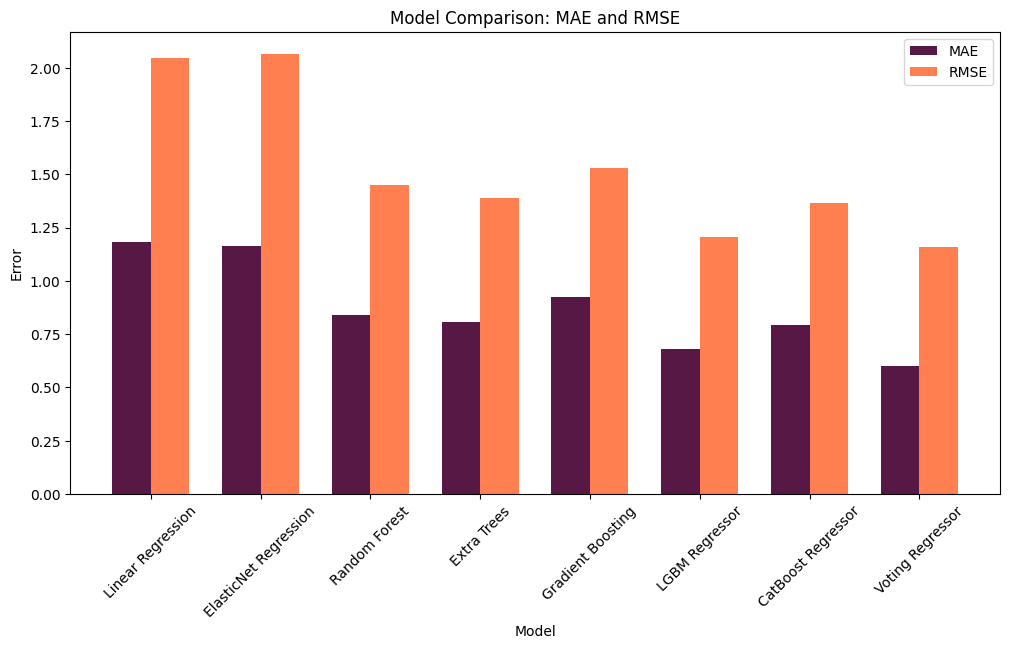

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the models and their positions on the x-axis
models = results1.index
positions = np.arange(len(models))

# Define the width of each bar
bar_width = 0.35

# Define unique colors for the bars
colors = ['#581845', '#FF7F50']
#'#900C3F', '#FFC300', 
# Plot MAE
plt.bar(positions - bar_width/2, results1['mae'], width=bar_width, label='MAE', color=colors[0])

# Plot RMSE
plt.bar(positions + bar_width/2, results1['rmse'], width=bar_width, label='RMSE', color=colors[1])

# Set labels and title
plt.title('Model Comparison: MAE and RMSE')
plt.xlabel('Model')
plt.ylabel('Error')

# Set the x-axis tick positions and labels
plt.xticks(positions, models, rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [22]:
data1 = data1.drop(['age', 'sex', 'address', 'School', 'S.No', ',school'], axis='columns')

In [23]:
# Feature Selection using KBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score, precision_score

Xvar = data1.drop('G3', axis=1)
yvar = data1['G3']

k_best = 10 
skb = SelectKBest(score_func=f_classif, k=k_best)
Xnewvar = skb.fit_transform(Xvar, yvar)

scores = skb.scores_
features = Xvar.columns
selected_features = Xvar.columns[skb.get_support()]
print('Feature scores:')
for i in range(len(features)):
    print(features[i], ':', scores[i])
print('\nSelected features:')
print(selected_features)

Feature scores:
famsize : 1.1394522340829532
Pstatus : 0.5241325552518998
Medu : 4.649272061187352
Fedu : 3.458793927913265
Mjob : 1.9398646764993202
Fjob : 1.2760744284936552
reason : 1.8470692178349923
guardian : 1.3058410512575123
traveltime : 2.2292313317179593
studytime : 2.7612328529408674
failures : 16.120277196840355
schoolsup : 2.487584163665422
famsup : 0.9917756196980875
paid : 1.5470836705345112
activities : 1.3213633771673532
nursery : 0.6660455513552567
higher : 5.0750169288928735
internet : 1.355035516515112
romantic : 1.720210012264435
famrel : 0.6332834799485477
freetime : 1.3141306814289118
goout : 1.6386187635232268
Dalc : 3.381105620964391
Walc : 2.8288741540926248
health : 1.6394903368501084
absences : 6.055203354787886
G1 : 208.8490530098885
G2 : 391.96090988392575

Selected features:
Index(['Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc', 'Walc',
       'absences', 'G1', 'G2'],
      dtype='object')


# Trial

In [94]:
from tabulate import tabulate

# Default values for the features
default_values = {
    'Medu': {0: 'none', 4: 'higher education'},
    'Fedu': {0: 'none', 4: 'higher education'},
    'studytime': {1: '<2 hours', 4: '>10 hours'},
    'failures': '0 to 3',
    'higher': {0: 'no', 1: 'yes'},
    'Dalc': {1: 'very low', 5: 'very high'},
    'Walc': {1: 'very low', 5: 'very high'},
    'absences': '0 to 96',
    'G1': '1 to 20',
    'G2': '1 to 20',
    'G3': '1 to 20'
}

# Student's specific values
new_student = {
    "Medu": 3,
    "Fedu": 2,
    "studytime": 3,
    "failures": 1,
    "higher": 1,
    "Dalc": 1,
    "Walc": 1,
    "absences": 9,
    "G1": 11,
    "G2": 14,
    "G3": 17
}

# Prepare the table rows
table_rows = []
for feature, values in default_values.items():
    input_range = new_student[feature] if feature in new_student else f"1 - {len(values)}" if values else ""
    default_val = values if values else ""
    table_rows.append([feature, input_range, default_val ])

# Print the table
table_headers = ["Input Feature", "Input Value", "Default Value"]
table = tabulate(table_rows, headers=table_headers, tablefmt="fancy_grid")
print(table)


╒═════════════════╤═══════════════╤════════════════════════════════════╕
│ Input Feature   │   Input Value │ Default Value                      │
╞═════════════════╪═══════════════╪════════════════════════════════════╡
│ Medu            │             3 │ {0: 'none', 4: 'higher education'} │
├─────────────────┼───────────────┼────────────────────────────────────┤
│ Fedu            │             2 │ {0: 'none', 4: 'higher education'} │
├─────────────────┼───────────────┼────────────────────────────────────┤
│ studytime       │             3 │ {1: '<2 hours', 4: '>10 hours'}    │
├─────────────────┼───────────────┼────────────────────────────────────┤
│ failures        │             1 │ 0 to 3                             │
├─────────────────┼───────────────┼────────────────────────────────────┤
│ higher          │             1 │ {0: 'no', 1: 'yes'}                │
├─────────────────┼───────────────┼────────────────────────────────────┤
│ Dalc            │             1 │ {1: 'very low',

In [95]:
from tabulate import tabulate

model = RandomForestRegressor(n_estimators=1000, criterion = 'poisson', max_depth = 100, min_samples_split = 5, min_samples_leaf = 10, min_weight_fraction_leaf = 0, max_features = 'auto', max_leaf_nodes = 100, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = 10, random_state = 5, verbose = 0, warm_start = False, ccp_alpha = 0)
model.fit(X_train, y_train)

# Preprocess the new student's data
new_student_df = pd.DataFrame([new_student])

# Predict the grade for the new student
predicted_grade = model.predict(new_student_df)

Rf_predg = predicted_grade[0]
# Print the predicted grade
print("Predicted Grade using Random Forest:", Rf_predg)

Predicted Grade using Random Forest: 17.0


In [96]:
from tabulate import tabulate

model = ExtraTreesRegressor(n_estimators=700, criterion = 'friedman_mse', max_depth = 700, min_samples_split = 2, min_samples_leaf = 5, min_weight_fraction_leaf = 0, max_features = 'auto', max_leaf_nodes = 500, min_impurity_decrease = 0.9, bootstrap = True, oob_score = True, n_jobs = 5, random_state = 1, verbose = 0, warm_start = True, ccp_alpha = 0)
model.fit(X_train, y_train)

# Preprocess the new student's data
new_student_df = pd.DataFrame([new_student])

# Predict the grade for the new student
predicted_grade = model.predict(new_student_df)

Etc_predg = predicted_grade[0]
# Print the predicted grade
print("Predicted Grade using Extra Trees:", Etc_predg)


Predicted Grade using Extra Trees: 16.40918656679399


In [97]:
from tabulate import tabulate

model = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators=52, criterion = 'squared_error')
model.fit(X_train, y_train)

# Preprocess the new student's data
new_student_df = pd.DataFrame([new_student])

# Predict the grade for the new student
predicted_grade = model.predict(new_student_df)

Gb_predg = predicted_grade[0]
# Print the predicted grade
print("Predicted Grade using GradientBoosting:", Gb_predg)


Predicted Grade using GradientBoosting: 16.979651465969365


In [98]:
from tabulate import tabulate

model = LGBMRegressor(colsample_bytree = 1.0, learning_rate = 0.1, n_estimators = 100, num_leaves = 31)
model.fit(X_train, y_train)

# Preprocess the new student's data
new_student_df = pd.DataFrame([new_student])

# Predict the grade for the new student
predicted_grade = model.predict(new_student_df)

Lgb_predg = predicted_grade[0]
# Print the predicted grade
print("Predicted Grade using LightGBM:", Lgb_predg)


Predicted Grade using LightGBM: 16.99808662446757


In [99]:
from tabulate import tabulate

model = CatBoostRegressor(depth = 4, iterations = 300, l2_leaf_reg = 1, learning_rate = 0.1, verbose= False)
model.fit(X_train, y_train)

# Preprocess the new student's data
new_student_df = pd.DataFrame([new_student])

# Predict the grade for the new student
predicted_grade = model.predict(new_student_df)

Cb_predg = predicted_grade[0]
# Print the predicted grade
print("Predicted Grade using CatBoost:", Cb_predg)


Predicted Grade using CatBoost: 16.83043642136584


In [100]:
model8 = VotingRegressor(estimators=[("random_forest", RandomForestRegressor()),
                                    ("catboost", CatBoostRegressor(verbose= False)),
                                    ("lgbm", LGBMRegressor())])
model.fit(X_train, y_train)

# Preprocess the new student's data
new_student_df = pd.DataFrame([new_student])

# Predict the grade for the new student
predicted_grade = model.predict(new_student_df)

Vot_predg = predicted_grade[0]
# Print the predicted grade
print("Predicted Grade using Voting:", Vot_predg)


Predicted Grade using Voting: 16.83043642136584


In [101]:
model = ['Random Forest', 'Extra Trees', 'Gradient Boosting', 'LGBM Regressor', 'CatBoost Regressor', 'Voting Regressor']
grades = [Rf_predg, Etc_predg, Gb_predg, Lgb_predg, Cb_predg, Vot_predg]
headers = ['Model', 'Predicted Grade']
table_data = list(zip(model, grades))
table = tabulate(table_data, headers=headers, floatfmt=".4f", tablefmt="fancy_grid")
print(table)

╒════════════════════╤═══════════════════╕
│ Model              │   Predicted Grade │
╞════════════════════╪═══════════════════╡
│ Random Forest      │           17.0000 │
├────────────────────┼───────────────────┤
│ Extra Trees        │           16.4092 │
├────────────────────┼───────────────────┤
│ Gradient Boosting  │           16.9797 │
├────────────────────┼───────────────────┤
│ LGBM Regressor     │           16.9981 │
├────────────────────┼───────────────────┤
│ CatBoost Regressor │           16.8304 │
├────────────────────┼───────────────────┤
│ Voting Regressor   │           16.8304 │
╘════════════════════╧═══════════════════╛
